In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d, splrep, splev
from scipy.integrate import simps

In [2]:
# Data (R in arcsec, N in N stars per square arcsec)

R_log10 = np.asarray([-0.301, 0.230, 0.415, 0.602, 0.756, 0.863, 0.954, 1.041, 1.079, 1.204,
                       1.255, 1.322, 1.431, 1.602, 1.778, 2.000, 2.301, 2.602, 3.000])

N_old_log10 = np.asarray([1.978, 2.000, 2.176, 2.079, 1.944, 1.964, 1.929, 1.857, 1.875, 1.813,
                          1.778, 1.740, 1.716, 1.591, 1.447, 1.322, 1.000, 0.845, 0.663])

N_all_log10 = np.asarray([2.484, 2.312, 2.342, 2.279, 2.114, 2.097, 2.021, 1.964, 1.919, 1.845, 
                          1.778, 1.740, 1.716, 1.591, 1.447, 1.332, 1.000, 0.845, 0.663])

err_log10 = np.asarray([0.180, 0.100, 0.080, 0.080, 0.080, 0.080, 0.080, 0.080, 0.080, 0.080, 
                        0.080, 0.080, 0.030, 0.030, 0.030, 0.030, 0.030, 0.030, 0.030, ])

$$
\nu (r) = -\frac{1}{\pi} \int_0^{\infty} \frac{d\Sigma}{dR} \frac{dR}{\sqrt{R^2 - r^2}}
$$
$$
\nu(r) v^2(r) = -\frac{1}{\pi} \int_0^{\infty} \frac{d(\Sigma \sigma^2)}{dR}
\frac{dR}{\sqrt{R^2 - r^2}}
$$

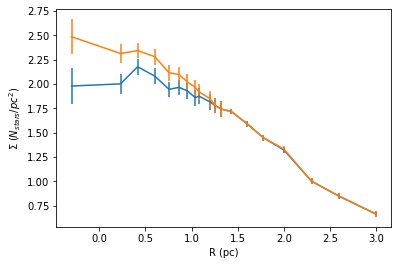

In [3]:
plt.errorbar(R_log10, N_old_log10, yerr=err_log10)
plt.errorbar(R_log10, N_all_log10, yerr=err_log10)
plt.xlabel('R (pc)')
plt.ylabel(r'$\Sigma \; (N_{stars} / pc^2)$')
plt.show()

In [4]:
R_vals     = np.power(10.0 * np.ones(len(R_log10)), R_log10)
N_old_vals = np.power(10.0 * np.ones(len(N_old_log10)), N_old_log10)
N_all_vals = np.power(10.0 * np.ones(len(N_all_log10)), N_all_log10)
err_vals   = np.power(10.0 * np.ones(len(err_log10)), err_log10)

In [9]:
# Cubic spline.
spl_old = splrep(R_vals, N_old_vals)
spl_all = splrep(R_vals, N_all_vals)

tck_old = splrep(R_vals, N_old_vals, s=0)
tck_all = splrep(R_vals, N_all_vals, s=0)

R_new = np.linspace(R_vals[0], R_vals[-1], num=100)

y_old = splev(R_new, tck_old, der=0)
y_all = splev(R_new, tck_all, der=0)

dy_old = splev(R_new, tck_old, der=1)
dy_all = splev(R_new, tck_all, der=1)

$$
\nu (r) = -\frac{1}{\pi} \int_r^{\infty} \frac{d\Sigma}{dR} \frac{dR}{\sqrt{R^2 - r^2}}
$$

In [30]:
def abel(dfdx, x):
    
    nx = len(x)
    integral = np.zeros(nx)
    
    for i in range(nx-1):
        
        divisor = np.sqrt(x[i:nx]**2 - x[i]**2)
        divisor[0] = divisor[1]
        integrand = dfdx[i:nx] / divisor
        
        integral[i] = (-1.0 / np.pi) * np.trapz(integrand, x[i:nx])
        
    return integral

In [31]:
abel_old = abel(dy_old, R_new)
abel_all = abel(dy_all, R_new)

In [32]:
abel_old[0]

15.802946364742628

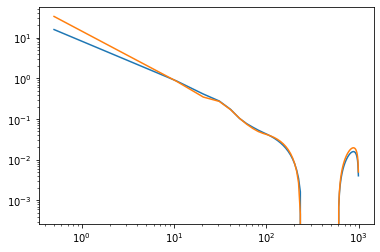

In [33]:
plt.plot(R_new[0:99], abel_old[0:99])
plt.plot(R_new[0:99], abel_all[0:99])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [38]:
for i in range(len(R_new)-1):
    str1 = '{0:7.2f}\t{1:.4f}\t{2:.4f}'.format(R_new[i], abel_old[i], abel_all[i])
    print(str1)

   0.50	15.8029	33.1743
  10.60	0.8625	0.8461
  20.69	0.4108	0.3463
  30.79	0.2771	0.2713
  40.88	0.1722	0.1693
  50.98	0.1037	0.1042
  61.08	0.0768	0.0744
  71.17	0.0627	0.0585
  81.27	0.0533	0.0494
  91.36	0.0469	0.0445
 101.46	0.0420	0.0413
 111.56	0.0376	0.0382
 121.65	0.0335	0.0349
 131.75	0.0296	0.0315
 141.84	0.0259	0.0281
 151.94	0.0224	0.0245
 162.04	0.0191	0.0210
 172.13	0.0160	0.0175
 182.23	0.0130	0.0141
 192.32	0.0103	0.0109
 202.42	0.0078	0.0079
 212.52	0.0055	0.0052
 222.61	0.0035	0.0027
 232.71	0.0016	0.0005
 242.80	-0.0000	-0.0015
 252.90	-0.0015	-0.0033
 262.99	-0.0029	-0.0049
 273.09	-0.0041	-0.0063
 283.19	-0.0051	-0.0076
 293.28	-0.0061	-0.0087
 303.38	-0.0069	-0.0096
 313.47	-0.0075	-0.0104
 323.57	-0.0081	-0.0111
 333.67	-0.0086	-0.0117
 343.76	-0.0090	-0.0121
 353.86	-0.0093	-0.0124
 363.95	-0.0095	-0.0126
 374.05	-0.0097	-0.0128
 384.15	-0.0097	-0.0128
 394.24	-0.0097	-0.0128
 404.34	-0.0096	-0.0126
 414.43	-0.0095	-0.0124
 424.53	-0.0093	-0.0122
 434.63	-0.009